In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from pathlib import Path

In [2]:
BASE_PATH = Path("/home/user/PycharmProjects/training/titanic")
TRAIN_PATH =  BASE_PATH / "train.csv"
TEST_PATH = BASE_PATH / "test.csv"
GENDER_SUBMISSION_PATH = BASE_PATH / "gender_submission.csv"

In [3]:
# load
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)
gender_sub_df = pd.read_csv(GENDER_SUBMISSION_PATH)

```
train_df.shape=(891, 12)
test_df.shape=(418, 11)
```

```
PassengerId      int64 - Not suppose to be a feature
Survived         int64 - Label (1/0)
Pclass           int64 - Ticket class (1/2/3)
Name            object - Non trivial to help (Might cause data leakge)
Sex             object - (male/female)-> TODO convert
Age            float64 - age..
SibSp            int64 - # of siblings / spouses aboard the Titanic
Parch            int64 - # of parents / children aboard the Titanic	
Ticket          object - Non trivial to help, Ticket number 	
Fare           float64 - Passenger fare	
Cabin           object - Cabin number -> TODO convert
Embarked        object - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) -> TODO convert
```

```
[X] PassengerId - probably should be removed.. beacuse train consists of 1-891 and test 892-1309
[X] Survived - label
[?] Pclass - might combine with other features
[ ] Name - 
[V] Sex - seems strong! Mostly males were board but more females survived.
[V] Age - survivles chanes like follow: young kids > old people > middle age.
[ ] SibSp -
[ ] Parch
[ ] Ticket - might be splited?
[ ] Fare - 
[ ] Cabin -
[ ] Embarked -
```

In [20]:
train_df.PassengerId
# test_df.PassengerId

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [4]:
# Show a sample of input_data

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(train_df.head(3).transpose())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(test_df.head(3).transpose())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(gender_sub_df.head(3).transpose())

,0,1,2
PassengerId,1,2,3
Survived,0,1,1
Pclass,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina"
Sex,male,female,female
Age,22.0,38.0,26.0
SibSp,1,1,0
Parch,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282
Fare,7.25,71.2833,7.925


,0,1,2
PassengerId,892,893,894
Pclass,3,3,2
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis"
Sex,male,female,male
Age,34.5,47.0,62.0
SibSp,0,1,0
Parch,0,0,0
Ticket,330911,363272,240276
Fare,7.8292,7.0,9.6875
Cabin,NaN,NaN,NaN


,0,1,2
PassengerId,892,893,894
Survived,0,1,0


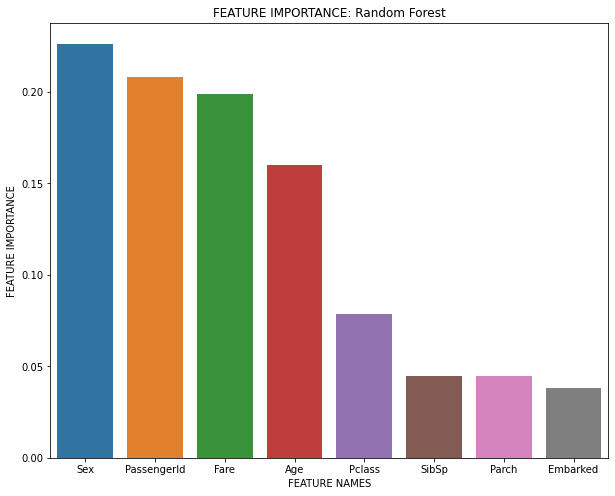

In [5]:
from IPython.display import Image
Image(filename='baseline_feature_importance.png')

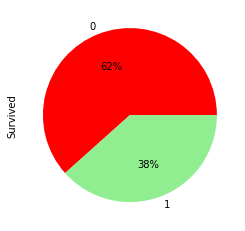

In [6]:
# About 40% survived
train_df.Survived.value_counts().plot.pie(autopct='%1.0f%%', colors=["red","lightgreen"])
_ = _ 

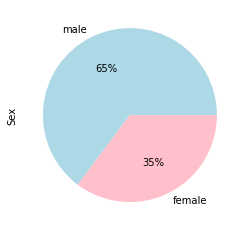

In [7]:
# About 65% of passengers were male
train_df.Sex.value_counts().plot.pie(autopct='%1.0f%%', colors=["lightblue","pink"])
_ = _ 

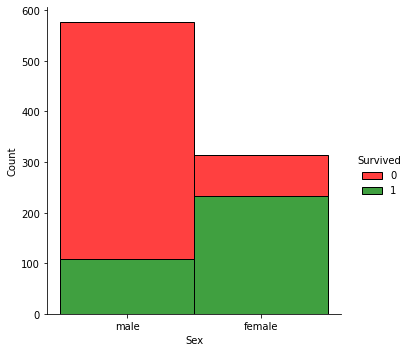

In [8]:
# Female had a bigger chance to survive
sns.displot(train_df, x='Sex',  hue='Survived', palette=["red", "green"], multiple="stack")
_ = _  

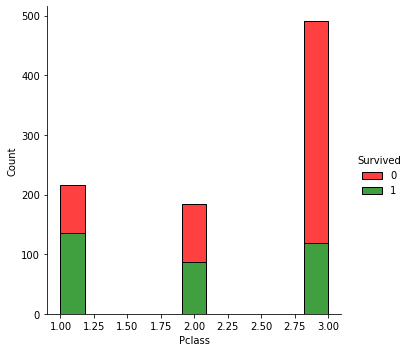

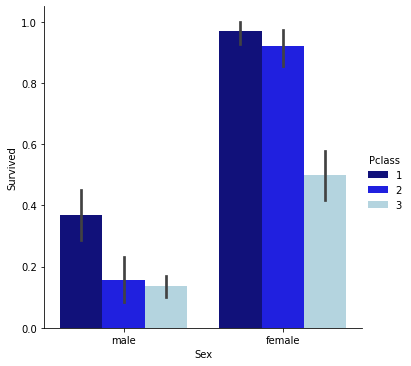

In [9]:
# The highest the pclass the non-survivels. In class 3 it most dramatical
sns.displot(train_df, x='Pclass',  hue='Survived', palette=["red", "green"], multiple="stack")

# Female+Pclass1/2 -> 0.85+ change to survive
# Male+Pclass2/3 -> 02- change to survive
sns.catplot(data=train_df, x="Sex", y="Survived", hue="Pclass", kind="bar",  palette=["darkblue", "blue", "lightblue"])
_ = _ 

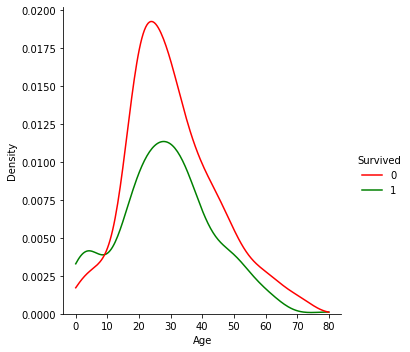

In [10]:
# Young kids (0-10) tends to survive.
# Old people (15-45) tends to not-survive :(
# Old people (50-90) tends to have 50-50 chance to survive.
sns.displot(train_df, x='Age',  hue='Survived', palette=["red", "green"], kind="kde", clip=(0.0, 80.0))
_ = _ 

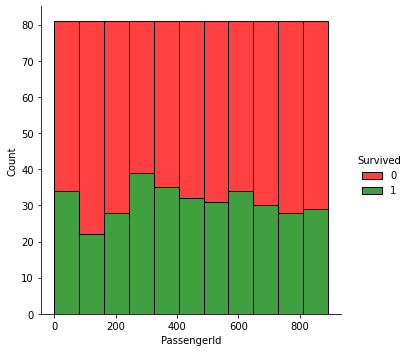

In [11]:
sns.displot(train_df, x='PassengerId',  hue='Survived', palette=["red", "green"], multiple="stack")
_ = _ 

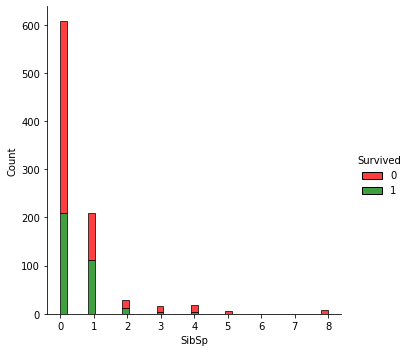

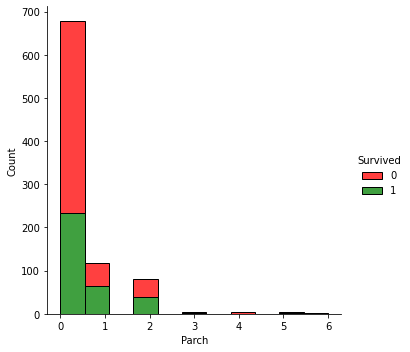

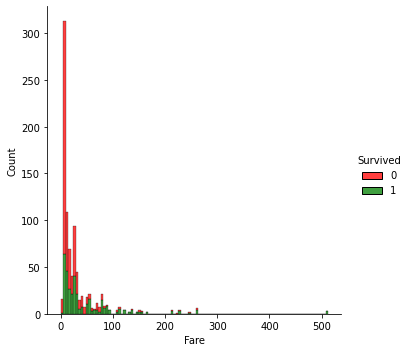

In [12]:
for col_name in ['SibSp', 'Parch', 'Fare']:
    sns.displot(train_df, x=col_name,  hue='Survived', palette=["red", "green"], multiple="stack")

